# **Laptop Price Prediction**

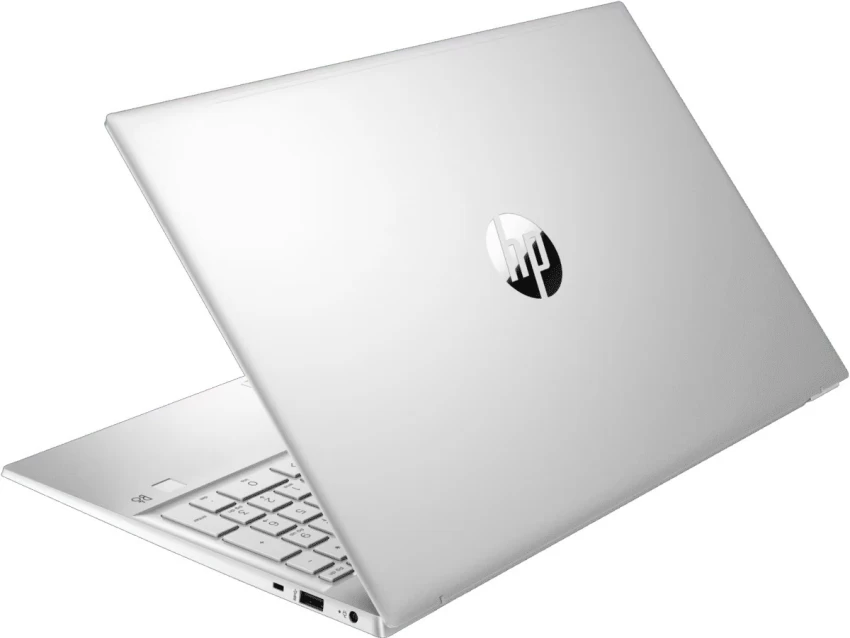

### **Table Of Contents:**
   1. Problem Statement
   2. Importing Libraries
   3. Overview about dataset
   4. Data Cleaning
   5. Exploratry Data Analysis(EDA)
   6. Feature Engineering
   7. Machine Learning Model
   8. Prediction
   9. Conclusion

### Problem Statement:
   - We will make a project for Laptop Price Prediction. This Project should be compatible to provide a temtative price of laptop according to the user configurations.  

### Importing Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading data and basic stats

In [ ]:
df=pd.read_csv('/content/laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
df.shape

(1303, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


### Data cleaning

In [ ]:
#  To Check missing values
df.isnull().sum()

,0
Unnamed: 0,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0


In [ ]:
# To check duplicated value
df.duplicated().sum()

0

In [ ]:
# Remove unnamed column
df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
907,Acer,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Celeron Dual Core 3205U 1.5GHz,4GB,16GB Flash Storage,Intel HD Graphics,Chrome OS,2.20kg,19127.52


It is good that there is no null values. We need a little change in Weight and Ram columns to convert them to numeric.

In [ ]:
# Convert the Ram and Weight columns to numeric
df['Ram']=df['Ram'].str.replace('GB','')
df['Weight']=df['Weight'].str.replace('kg','')
df['Ram']=df['Ram'].astype('int32')
df['Weight']=df['Weight'].astype('float32')

### EDA

<ipython-input-11-e255e46344c2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


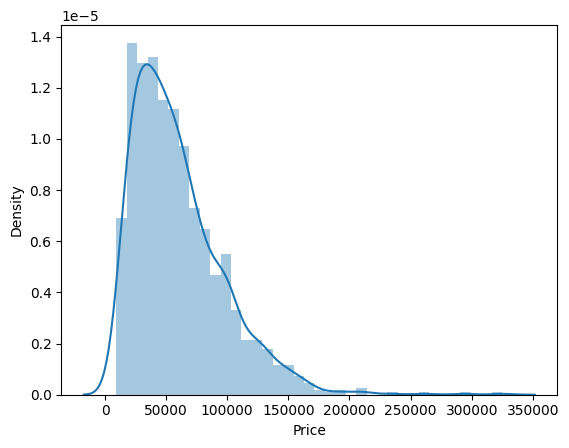

In [ ]:
# 1. Distribution of Target Columns
sns.distplot(df['Price'])
plt.show()

The distribution of the target variable is skewed and it is obvious that commodities with low price is sold and purchased more.

In [ ]:
# Company Relationship with Price
df['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [ ]:
df['Company'].nunique()

19

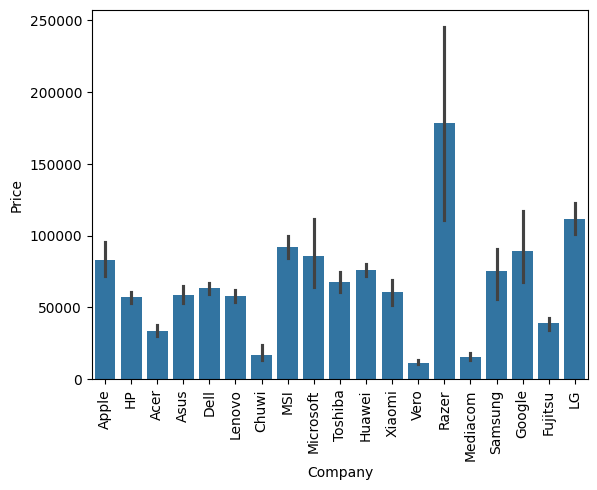

In [ ]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

Razer, LG, Microsoft, Google, MSI, Apple laptops are expensive and others are in budget range.

In [ ]:
# Relationship between laptop type and laptop price
df['TypeName'].unique()


array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [ ]:
df['TypeName'].nunique()

6

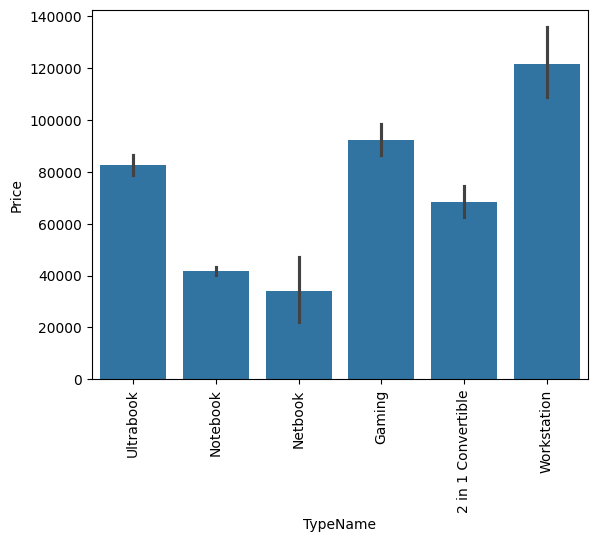

In [ ]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Variation of price with laptop size in inches
df['Inches'].unique()

array([13.3, 15.6, 15.4, 14. , 12. , 11.6, 17.3, 10.1, 13.5, 12.5, 13. ,
       18.4, 13.9, 12.3, 17. , 15. , 14.1, 11.3])

In [ ]:
df['Inches'].nunique()

18

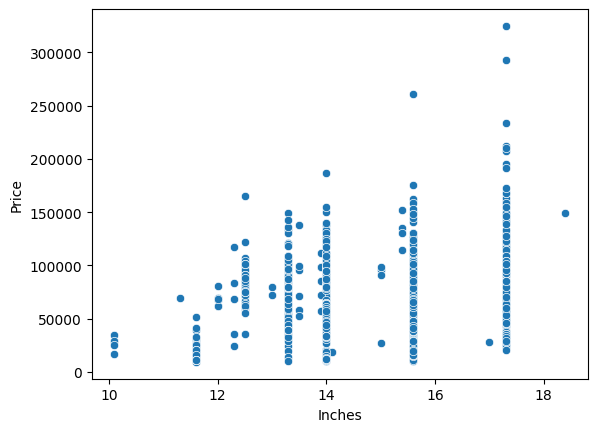

In [ ]:
sns.scatterplot(x=df['Inches'],y=df['Price'])
plt.show()

Since both the columns are numerical so we use scatterplot and From the above plot we can conclude that there is not a strong relationship between the Price and Size column.

In [ ]:
# Screen Resolution
df['ScreenResolution'].nunique()

40

Screen Resolution contains a lots of information. Before any analysis first, we need to perform Feature Engineering Over it.

In [ ]:
# CPU Column
df['Cpu'].nunique()

118

In [ ]:
# Ram Column
df['Ram'].nunique()

9

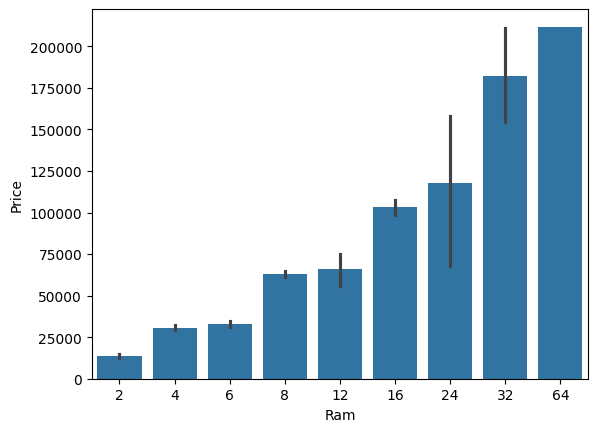

In [ ]:
# Variation of Laptop Price with Ram
sns.barplot(x=df['Ram'],y=df['Price'])
plt.show()

In [ ]:
# Memory Column
df['Memory'].nunique()

39

In [ ]:
# Gpu Column
df['Gpu'].nunique()

110

In [ ]:
# Operating Syatem
df['OpSys'].nunique()

9

In [ ]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [ ]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,1072
No OS,66
Linux,62
Windows 7,45
Chrome OS,27
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


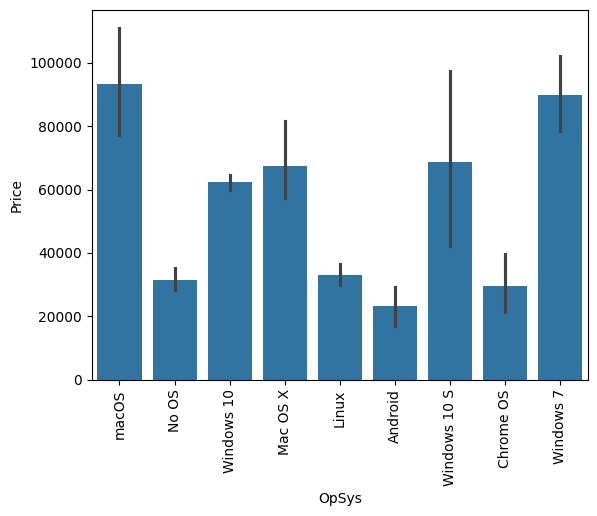

In [ ]:
# Variation of Price with operating system
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

There are many operating systems. We will keep all windows catgorise in one, Mac in one and remaining in others. So, we perform Feature Engineering here.

In [ ]:
# Weight Column
df['Weight'].nunique()

171

### Feature Engineering
feature Engineering is a process to convert raw data to meaningful information. There are many methods that come under feature engineering like transformation, categorical encoding etc. Now, the columns that are noisy so we need to perform some feature engineering.

In [ ]:
# Feature Engineering on Screen Resolution Column
df['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

#### Extract Either it is Touch Screen or not
It is binary variable so we can encode it as 0 and 1. 1 means laptop is touchscreen and 0 indicates laptop is not touchscreen.

In [ ]:
df['TouchScreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df.sample(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
775,Asus,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12,2TB HDD,Nvidia GeForce 940MX,Windows 10,2.30,44701.92,1
802,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.29,79866.72,0


In [ ]:
df['TouchScreen'].value_counts()

,count
TouchScreen,
0,1111
1,192


<Axes: xlabel='TouchScreen', ylabel='Price'>

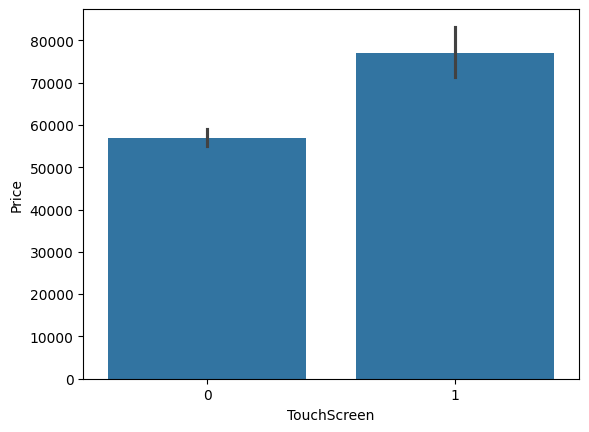

In [ ]:
sns.barplot(x=df['TouchScreen'],y=df['Price'])

 Shows that TouchScreen Laptop has More Price

In [ ]:
df['Ips']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [ ]:
df.sample(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips
184,Xiaomi,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Nvidia GeForce MX150,No OS,1.95,63882.72,0,1
510,Dell,Ultrabook,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8,128GB SSD,Intel HD Graphics 620,Windows 10,1.29,47898.72,1,1


In [ ]:
df['Ips'].value_counts()

,count
Ips,
0,938
1,365


<Axes: xlabel='Ips', ylabel='Price'>

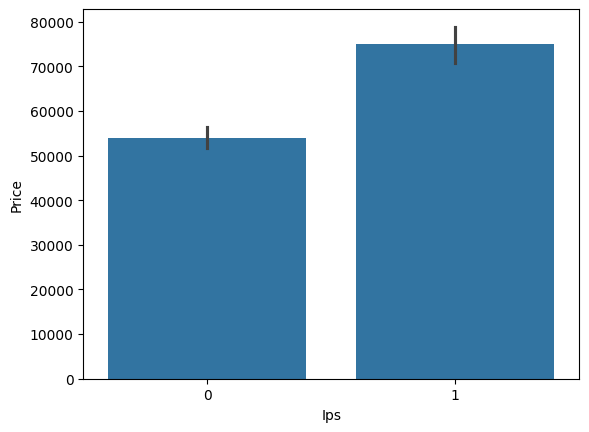

In [ ]:
sns.barplot(x=df['Ips'],y=df['Price'])

In [ ]:
# Split the ScreenResolution column
new_res=df['ScreenResolution'].str.split('x',n=1,expand=True)

In [ ]:
# Extract X-axis and Y_axis Screen Resolution Dimensions
df['x_res']=new_res[0]
df['y_res']=new_res[1]

In [ ]:
df.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,x_res,y_res
500,Asus,Netbook,11.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,64GB Flash Storage,Intel HD Graphics 500,Windows 10 S,1.2,18115.20,0,0,1366,768
1207,Lenovo,Notebook,15.6,1366x768,AMD E-Series 9000 2.2GHz,4,500GB HDD,AMD Radeon R2 Graphics,Windows 10,2.2,15930.72,0,0,1366,768
46,Lenovo,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,128GB SSD,Intel HD Graphics 520,No OS,2.2,19660.32,0,0,1366,768


In [ ]:
df['x_res']=df['x_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  x_res             1303 non-null   object 
 14  y_res             1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(9)
memory usage: 142.6+ KB


In [ ]:
df['x_res']=df['x_res'].astype('int32')
df['y_res']=df['y_res'].astype('int32')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  x_res             1303 non-null   int32  
 14  y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


Since the Inches do not have a strong correlation with Price but X and Y_axis resolution have a very strong correlation therefore we can convert these three columns into a single column ie Pixel Per Inches.

In [ ]:
# create new column Pixel Per Inch(ppi) ie Pixel Density
df['ppi']=(((df['x_res']**2)+(df['y_res']**2))**0.5/df['Inches']).astype('float')

In [ ]:
corr_data=df.select_dtypes(include='number')
corr_data.corr()['Price'].sort_values(ascending=False)

,Price
Price,1.000000
Ram,0.743007
x_res,0.556529
y_res,0.552809
ppi,0.473487
Ips,0.252208
Weight,0.210370
TouchScreen,0.191226
Inches,0.068197


We can drop extra column that are not of use.

In [ ]:
df.drop(columns=['ScreenResolution','Inches','x_res','y_res'],inplace=True)

In [ ]:
df.sample()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi
139,HP,Notebook,Intel Core i5 7200U 2.5GHz,4,256GB SSD,Intel HD Graphics 620,Windows 10,1.32,37242.72,0,1,165.632118


In [ ]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,190
Intel Core i7 7700HQ 2.8GHz,146
Intel Core i7 7500U 2.7GHz,134
Intel Core i7 8550U 1.8GHz,73
Intel Core i5 8250U 1.6GHz,72
Intel Core i5 6200U 2.3GHz,68
Intel Core i3 6006U 2GHz,64
Intel Core i7 6500U 2.5GHz,49
Intel Core i7 6700HQ 2.6GHz,43


In [ ]:
# We will extract New Cpu Column which is first 3 words from Cpu column
def processor_name(x):
  cpu_name=" ".join(x.split()[0:3])
  if cpu_name=='Intel Core i7' or cpu_name=='Intel Core i5' or cpu_name=='Intel Core i3':
    return cpu_name
  elif cpu_name.split()[0]=='Intel':
    return 'Other Intel Processor'
  else:
    return 'AMD Processor'

In [ ]:
df['Cpu_brand']=df['Cpu'].apply(lambda x: processor_name(x))

we are keeping five processor in our dataset as i3, i5, i7, Other Intel Processor, AMD Processor.

In [ ]:
df.sample()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu_brand
669,Acer,Notebook,Intel Core i3 6006U 2GHz,4,128GB SSD,Intel HD Graphics 520,Linux,2.1,21951.36,0,0,100.45467,Intel Core i3


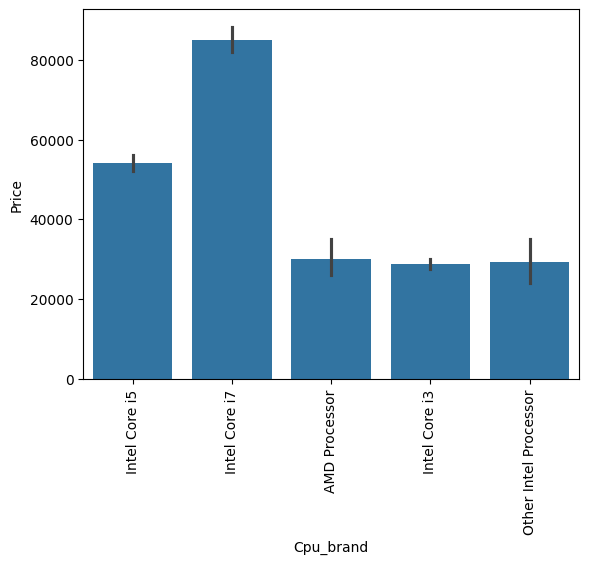

In [ ]:
# Variation of Price With Processors
sns.barplot(x=df['Cpu_brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

It shows that Intel Core i7 Processor has high price

In [ ]:
df.drop(columns=['Cpu'],inplace=True)

In [ ]:
df.sample()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu_brand
1301,HP,Notebook,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.92,0,0,100.45467,Intel Core i7


In [ ]:
# Feature Engineering on Memory column
df['Memory'].value_counts()

,count
Memory,
256GB SSD,412
1TB HDD,223
500GB HDD,132
512GB SSD,118
128GB SSD + 1TB HDD,94
128GB SSD,76
256GB SSD + 1TB HDD,73
32GB Flash Storage,38
2TB HDD,16


Memory column is again a noisy column that gives an understanding of hard drives. Many laptops have HDD and SSD both, as well in some there is an external slot present to insert after purchase. This column can disturb our analysis. so we have to do feature engineering properly.

In [ ]:
# Convert 'Memory' to string and remove decimal
df['Memory']=df['Memory'].astype(str).replace('\.0','',regex=True)

# Remove 'GB' and replace 'TB' with '000'
df['Memory']=df['Memory'].str.replace('GB','')
df['Memory']=df['Memory'].str.replace('TB','000')

#Split 'Memory' into two parts if there is a '+' sign:
new_memory=df['Memory'].str.split('+',n=1,expand=True)

# Assign the split parts to 'first' and 'second'
df['first']=new_memory[0]
df['first']=df['first'].str.strip()
df['second']=new_memory[1]

# Create binary columns to indicate presence of storage types in 'first'
df['HDD1']=df['first'].apply(lambda x: 1 if 'HDD' in x else 0)
df['SSD1']=df['first'].apply(lambda x: 1 if 'SSD' in x else 0)
df['Hybrid1']=df['first'].apply(lambda x: 1 if 'Hybrid' in x else 0)
df['Flash_storage1']=df['first'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

# Remove 'D' from 'first'
df['first']=df['first'].str.replace(r'\D','')
# Fill missing values in 'second' with '0'
df['second'].fillna('  0',inplace=True)

# Create binary columns to indicate presence of storage types in 'second':
df['HDD2']=df['second'].apply(lambda x: 1 if 'HDD' in x else 0)
df['SSD2']=df['second'].apply(lambda x: 1 if 'SSD' in x else 0)
df['Hybrid2']=df['second'].apply(lambda x: 1 if 'Hybrid' in x else 0)
df['Flash_storage2']=df['second'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

# Remove 'D' from 'second'
df['second']=df['second'].str.replace(r'\D','')


In [ ]:
df['first'].value_counts()

,count
first,
256 SSD,500
1000 HDD,225
128 SSD,172
512 SSD,138
500 HDD,132
32 Flash Storage,38
64 Flash Storage,16
2000 HDD,16
1000 SSD,16


In [ ]:
df['first']=df['first'].str.split(' ').apply(lambda x:x[0])
df['second']=df['second'].str.split(' ').apply(lambda x:x[2])

In [ ]:

df['first'].value_counts()

,count
first,
256,508
1000,250
128,177
512,140
500,132
32,45
64,17
2000,16
16,10


In [ ]:
df['second'].value_counts()

,count
second,
0,1095
1000,187
2000,15
256,3
500,2
512,1


In [ ]:
# Convert to numeric
df['first']=df['first'].astype(int)
df['second']=df['second'].astype(int)


In [ ]:
df['HDD']=df['first']*df['HDD1']+df['second']*df['HDD2']
df['SSD']=df['first']*df['SSD1']+df['second']*df['SSD2']
df['Hybrid']=df['first']*df['Hybrid1']+df['second']*df['Hybrid2']
df['Flash_storage']=df['first']*df['Flash_storage1']+df['second']*df['Flash_storage2']

In [ ]:
df.sample(2)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,...,Hybrid1,Flash_storage1,HDD2,SSD2,Hybrid2,Flash_storage2,HDD,SSD,Hybrid,Flash_storage
1202,Dell,2 in 1 Convertible,16,512 SSD,Intel UHD Graphics 620,Windows 10,2.0,68464.80,1,0,...,0,0,0,0,0,0,0,512,0,0
1290,Dell,Notebook,6,1000 HDD,Intel HD Graphics 620,Windows 10,2.3,24455.52,0,0,...,0,0,0,0,0,0,1000,0,0,0


Remove the columns which is not necessary.

In [ ]:
df.drop(columns=['first','second','HDD1','SSD1','Hybrid1','Flash_storage1','HDD2','SSD2','Hybrid2','Flash_storage2'],inplace=True)

In [ ]:
df.sample(2)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu_brand,HDD,SSD,Hybrid,Flash_storage
490,Lenovo,Notebook,8,256 SSD,Nvidia GeForce 940MX,Windows 10,2.30,53918.8272,0,1,141.211998,Intel Core i5,0,256,0,0
1178,MSI,Gaming,16,128 SSD + 1000 HDD,Nvidia GeForce GTX 970M,Windows 10,1.91,114731.5536,0,0,141.211998,Intel Core i7,1000,128,0,0


In [ ]:
df.drop(columns=['Hybrid','Flash_storage'],inplace=True)

In [ ]:
df.drop(columns=['Memory'],inplace=True)

In [ ]:
# Gpu(Graphical Processing unit) has many categories in data.
df['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,281
Intel HD Graphics 520,185
Intel UHD Graphics 620,68
Nvidia GeForce GTX 1050,66
Nvidia GeForce GTX 1060,48
Nvidia GeForce 940MX,43
AMD Radeon 530,41
Intel HD Graphics 500,39
Intel HD Graphics 400,37


In [ ]:
# We extrat the name of the brand
df['Gpu_brand']=df['Gpu'].apply(lambda x:x.split()[0])

In [ ]:
df['Gpu_brand'].value_counts()

,count
Gpu_brand,
Intel,722
Nvidia,400
AMD,180
ARM,1


In [ ]:
# There is only one row of Arm Gpu so remove it.
df=df[df['Gpu_brand']!='ARM']

In [ ]:
df.drop(columns=['Gpu'],inplace=True)

<ipython-input-81-6552775d328b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Gpu'],inplace=True)


In [ ]:
df.sample(2)

,Company,TypeName,Ram,Memory,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu_brand,HDD,SSD,Hybrid,Flash_storage,Gpu_brand
161,Acer,Notebook,4,256 SSD,Windows 10,3.0,42890.40,0,1,127.335675,Intel Core i5,0,256,0,0,Nvidia
656,Dell,Notebook,8,256 SSD,Windows 10,2.2,48964.32,0,0,141.211998,Intel Core i7,0,256,0,0,AMD


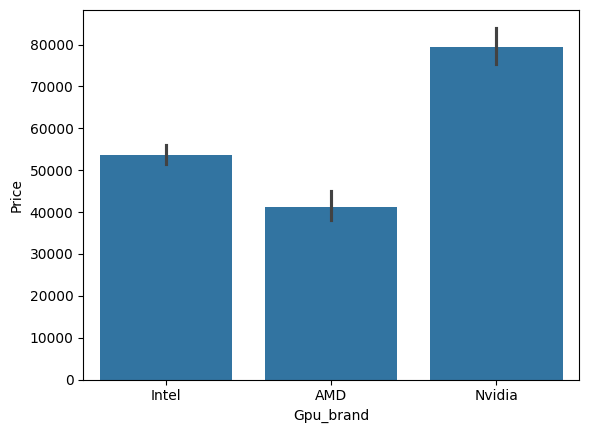

In [ ]:
# Variation of Laptop Price with Gpu Brand
sns.barplot(x=df['Gpu_brand'],y=df['Price'])
plt.show()

In [ ]:
# OpSys(Operating Syatem Column) column
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,1072
No OS,66
Linux,62
Windows 7,45
Chrome OS,26
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


In [ ]:
# We will keep all windows categories in one, mac in one and remaining in others.
def os_cat(x):
  if x=='Windows 10' or x=='Windows 7' or x=='Windows 10 S':
    return 'Windows'
  elif x=='macOS' or x=='Mac OS X':
    return 'Mac'
  else:
    return 'Other_OpSys'

In [ ]:
df['OS']=df['OpSys'].apply(os_cat)

<ipython-input-88-ea7737addd2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OS']=df['OpSys'].apply(os_cat)


In [ ]:
df.sample(2)

,Company,TypeName,Ram,Memory,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu_brand,HDD,SSD,Hybrid,Flash_storage,Gpu_brand,OS
253,Lenovo,2 in 1 Convertible,8,512 SSD,Windows 10,1.37,98514.72,1,1,158.48253,Intel Core i7,0,512,0,0,Intel,Windows
1130,HP,Notebook,8,2000 HDD,Windows 10,2.04,33513.12,0,0,100.45467,Intel Core i7,2000,0,0,0,Intel,Windows


In [ ]:
df.drop(columns=['OpSys'],inplace=True)

<ipython-input-90-b4b9708ecded>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['OpSys'],inplace=True)


<Axes: xlabel='OS', ylabel='Price'>

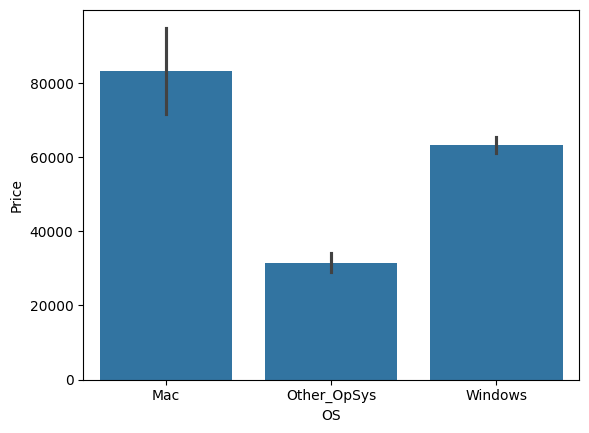

In [ ]:
# Variation of laptop Price with Operating System
sns.barplot(x=df['OS'],y=df['Price'])

Mac Operating syatem has highest Price.

In [ ]:
# Weight Column
df['Weight'].value_counts()

,count
Weight,
2.200,126
2.100,58
2.000,45
2.400,44
2.300,41
2.500,38
2.800,28
1.200,26
1.860,25


<Axes: xlabel='Weight', ylabel='Price'>

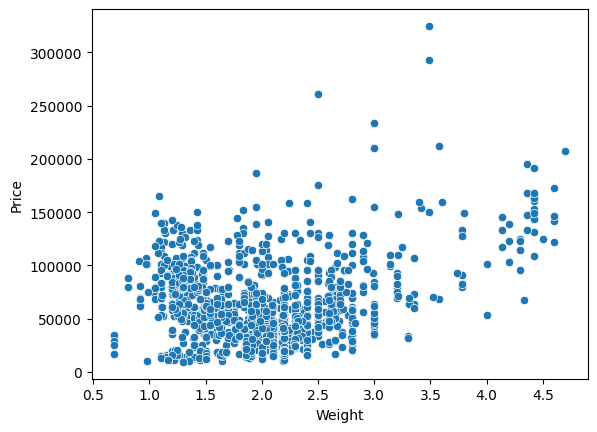

In [ ]:
# Variation of laptop price with Weight
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Ram          1302 non-null   int32  
 3   Weight       1302 non-null   float32
 4   Price        1302 non-null   float64
 5   TouchScreen  1302 non-null   int64  
 6   Ips          1302 non-null   int64  
 7   ppi          1302 non-null   float64
 8   Cpu_brand    1302 non-null   object 
 9   HDD          1302 non-null   int64  
 10  SSD          1302 non-null   int64  
 11  Gpu_brand    1302 non-null   object 
 12  OS           1302 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(4), object(5)
memory usage: 132.2+ KB


In [ ]:
data=df.select_dtypes(include='number')
data.corr()['Price'].sort_values(ascending=False)

,Price
Price,1.000000
Ram,0.742905
SSD,0.670660
ppi,0.475368
Ips,0.253320
Weight,0.209867
TouchScreen,0.192917
HDD,-0.096891


<Axes: >

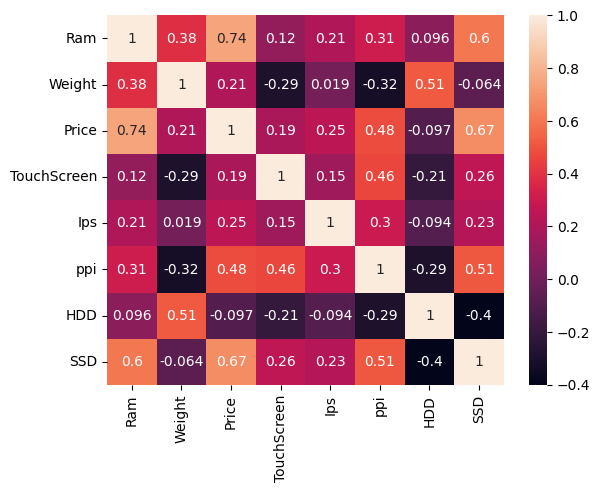

In [ ]:
heat_data = df.select_dtypes(include='number')
sns.heatmap(data.corr(),annot=True)

### Log Normal Transformation (ie Normalization)

<ipython-input-109-a90656806847>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


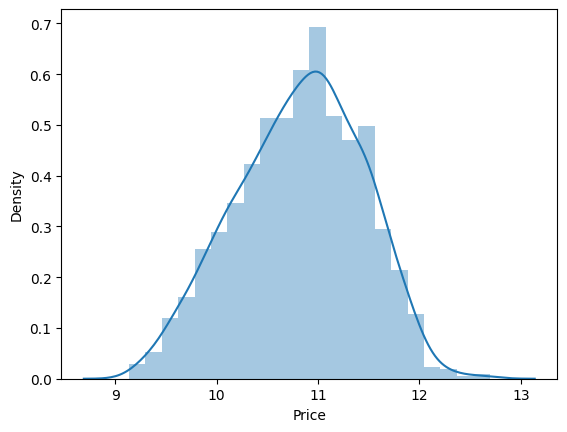

In [ ]:
# We have seen distribution of the target variable is Right Skewed. By transforming it to normal distribution performance of the algorithm will increase.
sns.distplot(np.log(df['Price']))
plt.show()

In [ ]:
df.describe()

,Ram,Weight,Price,TouchScreen,Ips,ppi,HDD,SSD
count,1302.000000,1302.000000,1302.000000,1302.000000,1302.00000,1302.000000,1302.000000,1302.000000
mean,8.385561,2.039416,59889.058673,0.146697,0.27957,146.568497,414.101382,183.874040
std,5.085166,0.665274,37251.183866,0.353940,0.44896,43.069016,515.889348,186.969314
min,2.000000,0.690000,9270.720000,0.000000,0.00000,90.583402,0.000000,0.000000
25%,4.000000,1.500000,31914.720000,0.000000,0.00000,127.335675,0.000000,0.000000
50%,8.000000,2.040000,52107.840000,0.000000,0.00000,141.211998,0.000000,256.000000
75%,8.000000,2.300000,79303.816800,0.000000,1.00000,157.350512,1000.000000,256.000000
max,64.000000,4.700000,324954.720000,1.000000,1.00000,352.465147,2000.000000,1024.000000


## **Machine Learning Modelling**

#### Import Libraries

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

#### Split in train and test data

In [ ]:
X=df.drop(columns=['Price'])
Y=np.log(df['Price'])

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Ram          1302 non-null   int32  
 3   Weight       1302 non-null   float32
 4   TouchScreen  1302 non-null   int64  
 5   Ips          1302 non-null   int64  
 6   ppi          1302 non-null   float64
 7   Cpu_brand    1302 non-null   object 
 8   HDD          1302 non-null   int64  
 9   SSD          1302 non-null   int64  
 10  Gpu_brand    1302 non-null   object 
 11  OS           1302 non-null   object 
dtypes: float32(1), float64(1), int32(1), int64(4), object(5)
memory usage: 122.1+ KB


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
X_train.shape

(1041, 12)

In [ ]:
X_test.shape

(261, 12)

### **Linear Regression**

In [ ]:
step1= ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2=LinearRegression()

new_df=Pipeline([('step1',step1),
                 ('step2',step2)])

new_df.fit(X_train,Y_train)

y_pred=new_df.predict(X_test)

print('R2 Score: ',r2_score(Y_test,y_pred))
print('MAE: ',mean_absolute_error(Y_test,y_pred))

R2 Score:  0.800240596612301
MAE:  0.20453995815620046


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### **Random Forest**

In [ ]:
step1= ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2=RandomForestRegressor(n_estimators=150,random_state=2,max_samples=0.5,
                            max_features=0.5,max_depth=10)

new_df=Pipeline([('step1',step1),
                 ('step2',step2)])

new_df.fit(X_train,Y_train)

y_pred=new_df.predict(X_test)

print('R2 Score: ',r2_score(Y_test,y_pred))
print('MAE: ',mean_absolute_error(Y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 Score:  0.8740447324855699
MAE:  0.1651768811621722


### **XGBoost Regressor**

In [ ]:
step1= ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2=XGBRegressor(n_estimators=100,
                   learning_rate=0.1,
                   max_depth=5)

new_df=Pipeline([('step1',step1),
                 ('step2',step2)])

new_df.fit(X_train,Y_train)

y_pred=new_df.predict(X_test)

print('R2 Score: ',r2_score(Y_test,y_pred))
print('MAE: ',mean_absolute_error(Y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 Score:  0.8762762602763009
MAE:  0.15804275557579595


XGBRegressor and RandomForest has approximately same Accuracy Score.